# Clustering (Unsupervised Learning)

## Linux Command
Google colab의 OS는 linux

In [48]:
# 현재 디렉토리 보기(Print Working Directory)
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
# pwd로 찾은 디렉토리에 있는 파일 확인(list 명령어)
# Colab > folder에 있는 내용을 보여줌
# Jupyter에서 !dir과 같은 기능
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
# 디렉토리 자세히 보기
!ls -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
!ls -l ./          # 위와 동일

'ls' is not recognized as an internal or external command,
operable program or batch file.


Run 출력 결과에서 **d: directory(폴더)**, **-: 파일**을 의미한다

In [52]:
# 하위 경로에 있는 파일 확인
!ls -l ./sample_data

'ls' is not recognized as an internal or external command,
operable program or batch file.


---

## K-Means Clustering
Divide unlabeled data into K different clusters and label it.

### Preparation

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
ws = pd.read_csv('./files/Wholesale_customers_data.csv')
ws.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


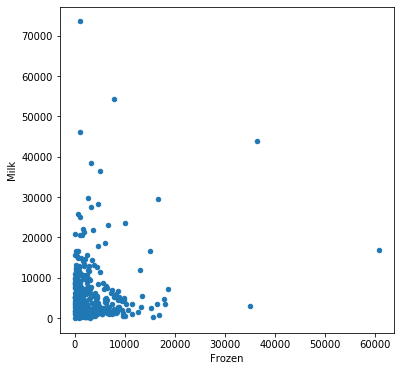

In [56]:
# See data plot
ws.plot(kind='scatter', figsize=(6, 6), x='Frozen', y='Milk')
plt.show()

In [57]:
# Standardization of all data ws
from sklearn.preprocessing import StandardScaler
type(StandardScaler())                    # StandardScaler object
type(StandardScaler().fit(ws))            # StandardScaler object

sklearn.preprocessing._data.StandardScaler

The type of two are same, which means we can directly call transform(ws) after fitting as below.

In [64]:
# One-line Standardization
ws_t = StandardScaler().fit(ws).transform(ws)
ws_t

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [60]:
# Same as below
StandardScaler().fit_transform(ws)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

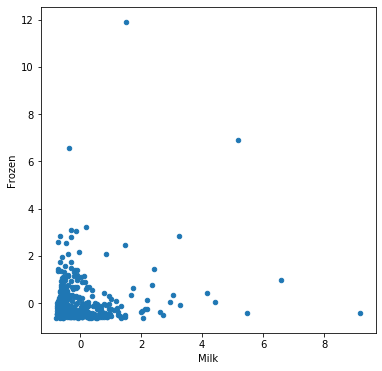

In [72]:
# Plot data
df = pd.DataFrame(ws_t, columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
df.plot(kind='scatter', figsize=(6, 6), x='Milk', y='Frozen')
plt.show()

### K-means

In [73]:
# Import module
from sklearn.cluster import KMeans

In [80]:
# Create KMeans model object
km = KMeans(n_clusters=5, n_init=20)
km

KMeans(n_clusters=5, n_init=20)

In [81]:
# Fit model
km.fit(ws_t)

KMeans(n_clusters=5, n_init=20)

In [82]:
# Get label 
km.labels_

array([4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1,
       1, 0, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4,
       4, 4, 4, 3, 4, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 1, 4, 3, 4, 4, 1, 3,
       1, 4, 1, 1, 1, 0, 1, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 3, 3, 0,
       1, 1, 1, 1, 3, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 4, 2, 4,

With same data, it will be same how to cluster data, but **different what label is assigned to each cluster.**

In [83]:
# Predict label with transformed data - same with above 
y_pred = km.predict(ws_t)          # array
y_pred

array([4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1,
       1, 0, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4,
       4, 4, 4, 3, 4, 4, 1, 1, 4, 4, 1, 1, 3, 4, 1, 1, 4, 3, 4, 4, 1, 3,
       1, 4, 1, 1, 1, 0, 1, 4, 4, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 3, 3, 0,
       1, 1, 1, 1, 3, 1, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 2, 4, 4, 2, 4,

In [84]:
# Predict label with unseen data
km.predict([[4, 1, 6895, 9810, 8790, 2081, 2890, 1670]])

array([3])

In [85]:
# Find the coordinate of cluster centers
km.cluster_centers_

array([[-3.33805633e-01,  3.75167418e-01,  2.60749645e+00,
         2.22231860e+00,  9.72964050e-01,  3.86855866e+00,
        -2.59306898e-02,  5.81601504e+00],
       [-6.90297086e-01,  5.90668285e-01,  8.93504967e-02,
        -3.56449331e-01, -4.54619674e-01,  7.04860444e-02,
        -4.47765749e-01, -1.38237755e-01],
       [-5.72772431e-01, -1.59749436e+00,  1.45371704e-02,
        -3.44758082e-01, -4.02466315e-01,  7.96677044e-02,
        -4.24411072e-01, -1.33102511e-01],
       [ 1.44865163e+00, -5.58343155e-02,  3.13830315e-01,
         3.92190593e+00,  4.27561037e+00, -3.57419457e-03,
         4.61816580e+00,  5.03365339e-01],
       [ 1.44865163e+00,  1.69928497e-01, -3.06362835e-01,
         4.17500207e-01,  6.51879518e-01, -3.57269701e-01,
         6.76847966e-01,  6.33174701e-03]])

The center of clusters above has n_feature columns. It means when calculating distance, **the algorithm makes n_feature dimension and the final centers also has n_feature dimension coordinate**, which represents its value for all n features.

In [116]:
# Add this outcome to dataframe
ws['Label'] = y_pred
ws.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,4


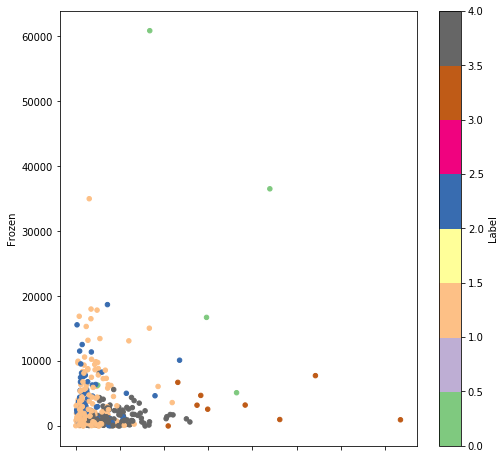

In [94]:
# Plot the result
# The keyword 'c' may be given as the name of a column to provide colors for each point.
# 'cmap' = colormap
ws.plot(kind="scatter", figsize=(8, 8), x='Milk', y='Frozen', c='Label', cmap='Accent')       

In [112]:
# Exclude some outliers in green & peach
new_ws = ws[~((ws['Label'] == 0) | (ws['Label'] == 1))]             # ~ : bitwise not
ws.shape, new_ws.shape           # size decreased

((440, 9), (227, 9))

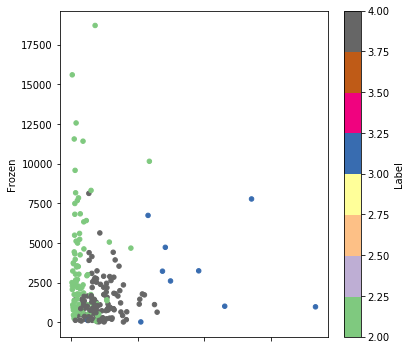

In [119]:
new_ws.plot(kind='scatter', figsize=(6, 6), x='Milk', y='Frozen', c='Label', cmap='Accent')
plt.show()             #

Only label=[2, 3, 4] shown with reduced y-axis.